# Leagues Comparison

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
import networkx as nx
from collections import Counter

data_partite = pd.read_csv("data_1/data_matches.csv", encoding='latin-1')
campionati = pd.read_csv("data_1/leagues.csv", encoding='latin-1')

In [2]:
def transformation(dataset, column, retain, new_col_names):
    new_data = dataset.merge(campionati, left_on= column, right_on = "Squad", how='outer').fillna(0)
    new_data = new_data[(new_data['League'] != 0) & (new_data[column] != 0)]
    new_data = new_data[retain]
    new_data.columns = new_col_names
    new_data['DR'] = new_data['DR'].apply(lambda x: int(x))
    new_data = new_data.reset_index()
    new_data = new_data.drop(['index'],axis = 1)
    return new_data

df3 = transformation(data_partite, 'Home_Team', ["League","Away_Team","Winner","DR"], ['Home_Team',"Away_Team","Winner","DR"])
df4 = transformation(df3, "Away_Team", ["Home_Team","League","Winner","DR"], ['Home_Team',"Away_Team","Winner","DR"])
df5 = transformation(df4, "Winner", ["Home_Team","Away_Team","League","DR"], ['Home_League',"Away_League","Winner","DR"])

df5 = df5[df5["Home_League"] != df5["Away_League"]]

In [3]:
list1 = [i for i in df5['Home_League']]
list2 = [i for i in df5['Away_League']]
list3 = list1+list2
Counter(list3).most_common()

[('La Liga', 629),
 ('Premier League', 601),
 ('Bundesliga', 574),
 ('Serie A', 492),
 ('Ligue 1', 436),
 ('Liga Portuguesa', 380),
 ('Greece League', 376),
 ('Russian League', 362),
 ('Eredivisie', 290),
 ('Belgian League', 272),
 ('Turkish League', 252),
 ('Ukraine League', 244),
 ('Swiss Super League', 237),
 ('Austrian Bundesliga', 227),
 ('Czech League', 186),
 ('HNL 1', 156),
 ('Denmark League', 155),
 ('Norway League', 112),
 ('Belarus League', 104),
 ('Bulgarian League', 102),
 ('Slovak League', 99),
 ('Serbian League', 96),
 ('Ekstraklasa', 94),
 ('Sweden League', 93),
 ('Cypro League', 87),
 ('Romanian League', 83),
 ('Israeli Ligue', 62),
 ('Premyer Liqasi', 44),
 ('Hungary League', 38),
 ('Luxembourg League', 36),
 ('Kazaki League', 29),
 ('Divizia Nasional', 28),
 ('Albanian League', 22),
 ("Ligat ha'Al", 20),
 ('Finland League', 19),
 ('Welsh League', 18),
 ('Bosnia Premijer Liga', 10),
 ('Erovnuli Liga', 9)]

In [4]:
df_a = pd.DataFrame(index = df5.Home_League.unique(),columns = df5.Home_League.unique())
df_a = df_a.fillna(0)

nazioni = df5.Home_League.unique()

for i in range(len(df5)):
    a = Counter(df5.iloc[i][:3].values)
    rev = {v: k for k, v in a.items()}
    loser = rev[1]
    df_a[df5.iloc[i]['Winner']][loser] += df5.iloc[i][3]
    
v = pd.DataFrame(columns = ['perdente',"vincente","di quanto"])
for k in range(len(df_a)):
    for j in range(len(df_a)):
        v = v.append({'perdente': df_a.columns[k],'vincente': df_a[df_a.columns[k]].index[j],'di quanto':df_a[df_a.columns[k]][j]}, ignore_index = True)

v = v[v['vincente'] != v['perdente']]

In [5]:
a = list(set([i for i in v['vincente']]))
b = list(set([i for i in v['perdente']]))
c = list(set(a+b))
subset = v[['vincente', 'perdente','di quanto']]
tuples = [tuple(x) for x in subset.to_numpy()]
tuples = [x for x in tuples if x[2] != 0] 

G = nx.DiGraph()
G.add_nodes_from(c)
G.add_weighted_edges_from(tuples)
G.edges(data=True)

OutEdgeDataView([('Premyer Liqasi', 'Ligue 1', {'weight': 1}), ('Premyer Liqasi', 'Premier League', {'weight': 17}), ('Premyer Liqasi', 'Serie A', {'weight': 9}), ('Premyer Liqasi', 'Bundesliga', {'weight': 8}), ('Premyer Liqasi', 'Denmark League', {'weight': 1}), ('Premyer Liqasi', 'Ukraine League', {'weight': 1}), ('Premyer Liqasi', 'Eredivisie', {'weight': 2}), ('Premyer Liqasi', 'Czech League', {'weight': 3}), ('Premyer Liqasi', 'Belgian League', {'weight': 4}), ('Premyer Liqasi', 'Liga Portuguesa', {'weight': 7}), ('Premyer Liqasi', 'La Liga', {'weight': 5}), ('Premyer Liqasi', 'Greece League', {'weight': 1}), ('Premyer Liqasi', 'Austrian Bundesliga', {'weight': 2}), ('Premyer Liqasi', 'Divizia Nasional', {'weight': 1}), ('Premyer Liqasi', 'Ekstraklasa', {'weight': 1}), ('Premyer Liqasi', 'Belarus League', {'weight': 1}), ('Ukraine League', 'Swiss Super League', {'weight': 4}), ('Ukraine League', 'Ligue 1', {'weight': 19}), ('Ukraine League', 'Premier League', {'weight': 56}), ('U

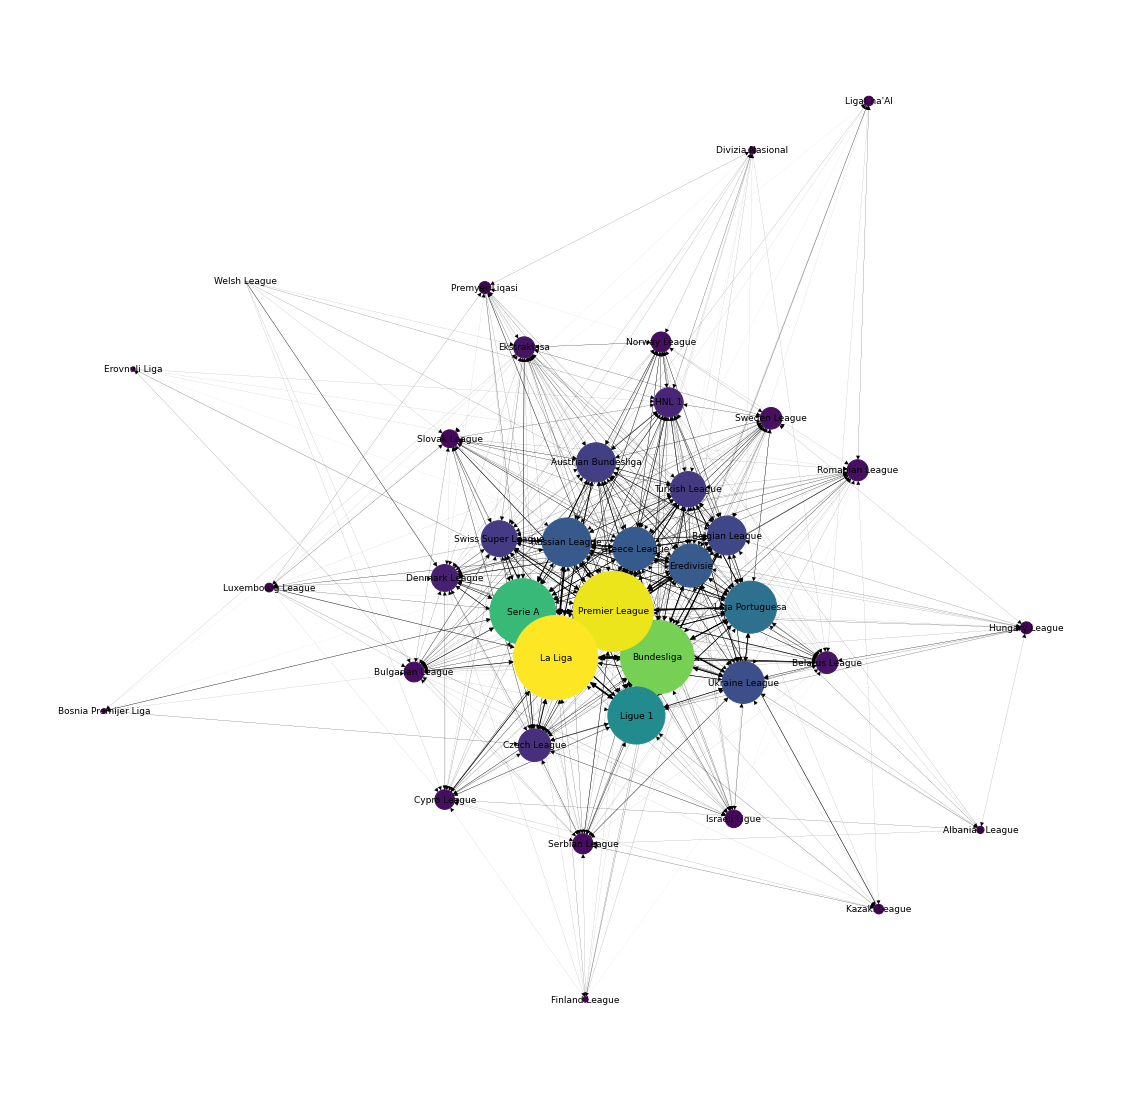

In [24]:
pos = nx.spring_layout(G)

node_size = [7.5 * G.in_degree(i) * np.mean([k[2]['weight'] for k in list(G.in_edges(i,data = True))]) for i in G]
node_color = [50 * G.in_degree(i) * sum([k[2]['weight'] for k in list(G.in_edges(i,data = True))]) for i in G]
weights = [G[i][j]['weight'] * 0.025 for i,j in G.edges()]

plt.figure(figsize = (20,20))
           
nx.draw_networkx(G, 
                 pos,
                 with_labels = False,
                 node_color = node_color,
                 node_size = node_size, 
                 width = weights)

nx.draw_networkx_labels(G, pos = pos, font_color = "black", font_size = 9)

plt.box(on = None)
plt.axis('off')

plt.show()

In [25]:
lista_j = [[i, G.in_degree(i) * np.mean([k[2]['weight'] for k in list(G.in_edges(i,data = True))])] for i in G]
lista_j = [j for j in lista_j if ~np.isnan(j[1])]

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

X = [G.in_degree(i) * np.mean([k[2]['weight'] for k in list(G.in_edges(i,data = True))]) for i in G]
X = [j for j in X if ~np.isnan(j)]
X.append(0)

scaled_x = NormalizeData(X)

y = [[lista_j[i][0], scaled_x[i]] for i in range(len(lista_j))]

diz={}

for i in range(len(y)):
    diz[y[i][0]] = y[i][1]
    
diz = {k: v for k, v in sorted(diz.items(), key=lambda item: item[1], reverse=True)}
diz

{'La Liga': 1.0,
 'Premier League': 0.90552016985138,
 'Bundesliga': 0.7632696390658174,
 'Serie A': 0.60828025477707,
 'Ligue 1': 0.4617834394904458,
 'Liga Portuguesa': 0.38216560509554137,
 'Russian League': 0.3343949044585987,
 'Eredivisie': 0.2632696390658174,
 'Greece League': 0.26220806794055196,
 'Ukraine League': 0.24946921443736728,
 'Austrian Bundesliga': 0.21549893842887471,
 'Belgian League': 0.21337579617834393,
 'Swiss Super League': 0.18152866242038215,
 'Turkish League': 0.1762208067940552,
 'Czech League': 0.14968152866242038,
 'HNL 1': 0.11889596602972398,
 'Denmark League': 0.1019108280254777,
 'Belarus League': 0.06687898089171973,
 'Sweden League': 0.06581740976645434,
 'Romanian League': 0.06263269639065816,
 'Ekstraklasa': 0.06263269639065816,
 'Serbian League': 0.057324840764331204,
 'Norway League': 0.05626326963906581,
 'Bulgarian League': 0.05520169851380042,
 'Cypro League': 0.05414012738853503,
 'Slovak League': 0.044585987261146494,
 'Israeli Ligue': 0.04

In [26]:
second_ranking = pd.read_html('https://www.globalfootballrankings.com/')[0]
second_ranking = second_ranking[['League','Average SPI']]
second_ranking['League'] = second_ranking['League'].apply(lambda x: (' ').join(x.split()[1:]))

lista_SPI = [i for i in second_ranking['Average SPI']]
lista_SPI.append(0)

scaled_SPI = NormalizeData(lista_SPI)

diz2={}

for i in range(len(second_ranking)):
    diz2[second_ranking['League'][i]] = scaled_SPI[i]
    
diz2

{'Barclays Premier League': 1.0,
 'Spanish Primera Division': 0.9562662293289599,
 'German Bundesliga': 0.9464261309279759,
 'Italy Serie A': 0.8779554462211288,
 'French Ligue 1': 0.8301216345496788,
 'Portuguese Liga': 0.7149104824381577,
 'Dutch Eredivisie': 0.7028836955036217,
 'Brasileiro Série A': 0.6740467404674046,
 'Mexican Primera Division Torneo Clausura': 0.6483531501981686,
 'Russian Premier Liga': 0.6251195845291786,
 'English League Championship': 0.6025693590269237,
 'Austrian T-Mobile Bundesliga': 0.5902692360256936,
 'Belgian Jupiler League': 0.5852125187918545,
 'Turkish Turkcell Super Lig': 0.5453054530545305,
 'Swiss Raiffeisen Super League': 0.5416154161541615,
 'Danish SAS-Ligaen': 0.5401120677873446,
 'Major League Soccer': 0.5390187235205685,
 'Argentina Primera Division': 0.5312286456197894,
 'Scottish Premiership': 0.5253519201858685,
 'Japanese J League': 0.4850348503485035,
 'German 2. Bundesliga': 0.48284816181495144,
 'Greek Super League': 0.4679513461801